# SUPPORT VECTOR MACHINE PROJECT 
## Oluwatosin Adewale
## IE 7860 

In [ ]:
### Please refresh the kernel before running each individual section. I.e every problem

## FONT RECOGNITION PROBLEM

### Importing required packages

In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import numpy as np

### Loading the datasets and Data preprocessing

In [2]:
# Load the datasets
train_data = pd.read_csv('Training Data.csv')
test_data = pd.read_csv('Testing Data.csv')
print(train_data)

    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0         8.0        0.0        0.0        0.0        0.0        0.0   
1         7.0        0.0        0.0        0.0        0.0        0.0   
2        12.0       10.0        1.0        1.0        0.0        0.0   
3        21.0       10.0        4.0        4.0        0.0        1.0   
4        27.0       12.0        3.0        3.0        0.0        8.0   
..        ...        ...        ...        ...        ...        ...   
74        0.0        5.0        6.0        6.0        0.0        0.0   
75       18.0        0.0        0.0       10.0        0.0        0.0   
76       18.0        0.0        0.0       10.0        0.0        0.0   
77       22.0        0.0        0.0       12.0        0.0        0.0   
78        NaN        NaN        NaN        NaN        NaN        NaN   

    Feature_7  Feature_8  Feature_9  Feature_10  ...  Output_Q  Output_R  \
0         0.0        0.0        0.0         0.0  ...       

In [4]:
print("NaN values in training data:", train_data.isnull().any().sum())
print("NaN values in testing data:", test_data.isnull().any().sum())

NaN values in training data: 43
NaN values in testing data: 3


In [5]:
# Drop the last row with all nan values
train_data = train_data.drop(train_data.index[-1])

# Check for NaN values in each column
nan_columns = train_data.columns[train_data.isnull().any()].tolist()

# Print out the columns with NaN values
print("Columns with NaN values:", nan_columns)

# Drop columns with any NaN values
train_data = train_data.dropna(axis=1)
test_data = test_data.dropna(axis=1)

# Verify dropped columns
dropped_columns = set(train_data.columns[train_data.isnull().any()].tolist())
 
print(dropped_columns)
print(train_data)
print(test_data)

Columns with NaN values: ['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
set()
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0         8.0        0.0        0.0        0.0        0.0        0.0   
1         7.0        0.0        0.0        0.0        0.0        0.0   
2        12.0       10.0        1.0        1.0        0.0        0.0   
3        21.0       10.0        4.0        4.0        0.0        1.0   
4        27.0       12.0        3.0        3.0        0.0        8.0   
..        ...        ...        ...        ...        ...        ...   
73        0.0       10.0        3.0        3.0        0.0        0.0   
74        0.0        5.0        6.0        6.0        0.0        0.0   
75       18.0        0.0        0.0       10.0        0.0        0.0   
76       18.0        0.0        0.0       10.0        0.0        0.0   
77       22.0        0.0        0.0       12.0        0.0        0.0   

    Feature_7  Feature_8  Feature_9  Feature_10  ...  Outp

The NaN values have to be dropped in this specific order otherwise the data is not handled properly leading to problems with the model

### Model preparation and Training

In [6]:
# separating features and labels
x_train = train_data.iloc[:, :14].values
y_train = np.argmax(train_data.iloc[:, 14:].values, axis=1)
x_test = test_data.iloc[:, :14].values
y_test = np.argmax(test_data.iloc[:, 14:].values, axis=1)

In [7]:
# Scaling features
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [8]:
# Initializing and training the SVM model
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(x_train_scaled, y_train)

SVC()

### Evaluating the model

In [9]:
# Predicting with the trained model
y_pred = svm_model.predict(x_test_scaled)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM model: {accuracy:.4f}")


Accuracy of SVM model: 0.8333


In [10]:
# Setting up cross-validation
skf = StratifiedKFold(n_splits=3)  # Adjust n_splits based on the size of your data

# Setting up the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example range for Box constraint C
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Example values for RBF kernel coefficient
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=skf, scoring='accuracy')

# Grid search
grid_search.fit(x_train_scaled, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters found: {best_params}")
print(f"Best cross-validated accuracy: {best_score:.4f}")


Best parameters found: {'C': 10, 'gamma': 'scale'}
Best cross-validated accuracy: 0.8974


In [11]:
# Check the number of samples for each class
class_counts = np.bincount(y_train)
print(class_counts)


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [12]:
## Final Model building and Assessment based on grid search hyperparameters
# Initialize the final model with the best parameters found by grid search
final_model = SVC(kernel='rbf', C=10, gamma='scale')

# Fit the final model on the entire training data
final_model.fit(x_train_scaled, y_train)

# Predicting on the test data
y_pred_final = final_model.predict(x_test_scaled)

# Final accuracy on the test data
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"Final Model Accuracy on Test Data: {final_accuracy:.4f}")


Final Model Accuracy on Test Data: 0.8590


### Visualizing the SVM model performance

The SVM font recognition models performance is visualized using a:
* Confusion matrix - to visually describe the performance of the model on test data to gain insights into the types of errors the model is making. It provides a good understanding of the models accuracy per class
* Classification report - For a better understanding of precision, recall and F-1  score within the models classifications
* Learning curves - To get a visual understanding of how much benefit can be derived by adding more training data and whether the estimator suffers from a variance or bias error

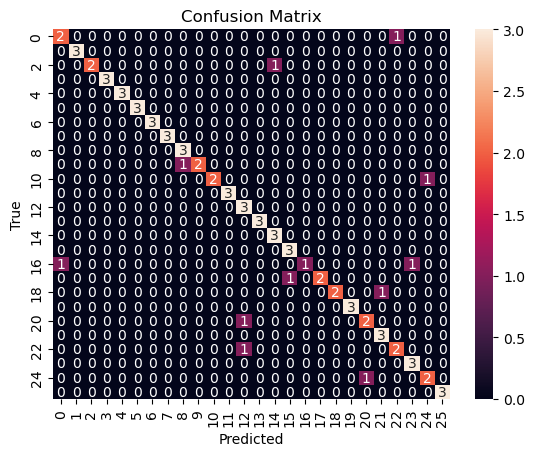

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The resulting confusion matrix shows 9 of the 26 classes(the classes with values other than 3 on the diagonal) being occasionally misclassified with class 16 (Corresponding alphabet Q) being the most misclassified 

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       0.75      1.00      0.86         3
           9       1.00      0.67      0.80         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       0.60      1.00      0.75         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       0.75      1.00      0.86         3
          16       1.00      0.33      0.50         3
          17       1.00    

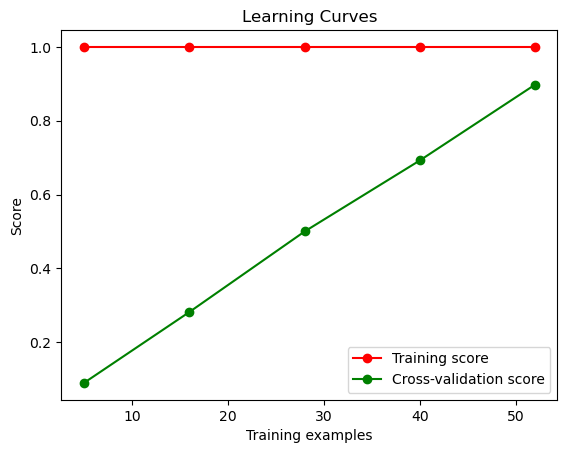

In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    SVC(kernel='rbf', C=10, gamma='scale'), x_train_scaled, y_train, cv=3, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


Based on the results of the learning curves, it seems that the model may be overfitting the data as indicated by the consistently high training score from the onset. The cross-validation score is rising as it should as more data is being added, however, teh large gap betwen the training score and the cross validation score is cause for concern for me. It indicates that the model may be learning the data too well and not performing as well on new or unseen data. I also expected to see a kind of convergence between the training and cross validation score but there is none apparent. The model may either be too complex for the font recognition task or be in need of some feature engineering

## REPORT

#### Title: Development of an SVM Model for Font Recognition

#### Introduction:

The report documents the development of a Support Vector Machine (SVM) model designed for the recognition of different font types. The objective is to distinguish between various fonts, a task integral to the field of optical character recognition and document analysis.

#### Initial Steps and Data Preprocessing:

- Loaded the font recognition dataset containing features for 26 characters across different fonts.
- Conducted an initial data inspection, identifying and addressing missing values by removing the last row with all NaN values and dropping columns with any missing values to maintain data integrity.
- Checked class distributions to ensure a balanced dataset, crucial for avoiding biased model training towards more frequent classes.

#### Feature Scaling:

- Applied MinMax scaling to normalize the feature space, transforming the feature values to a range between 0 and 1, aiding in the model's convergence and performance.

#### SVM Model Construction:

- Initialized the SVM with an RBF (radial basis function) kernel to handle non-linear relationships in the data.
- Faced initial challenges in training due to the multi-label nature of the dataset. Resolved this by transforming the multi-label outputs into a single label, enabling the SVM to interpret and learn from the data correctly.

#### Model Training and Evaluation:

- Encountered a ValueError during the model training process, indicating a mismatch in array shapes. This issue was resolved by flattening the output labels to make them compatible with the SVM's requirements.
- After successful model training, predictions were made on the scaled test data, and the model's accuracy was evaluated using the `accuracy_score` function from the `sklearn.metrics` module.

#### Hyperparameter Tuning and Cross-validation:

- Employed StratifiedKFold and GridSearchCV to perform hyperparameter tuning, which included optimizing the Box constraint (C) and the kernel coefficient (gamma).
- Due to the limited number of samples per class, adjusted the `n_splits` parameter for cross-validation to prevent errors and ensure that all classes were adequately represented in each fold.
- Identified the optimal hyperparameters leading to the highest cross-validation accuracy score, which was used for the final model.

#### Final Model and Assessment:

- The final SVM model was built using the optimal hyperparameters found during grid search.
- The model's final accuracy on the test data was 0.8590, which was a satisfactory performance, albeit with room for improvement.

#### Visualizations:

- Plotted learning curves to visualize the model's performance across training examples, highlighting the potential issues of overfitting given the training score was significantly higher than the cross-validation score.
- Generated a confusion matrix to visually assess the model's predictive capabilities on a class-by-class basis.

#### Challenges and Adjustments:

- Addressed and corrected various errors and warnings that arose during model training, ensuring that the data fed into the SVM was appropriately structured and scaled.
- Adjusted the cross-validation strategy to account for the sparse nature of the dataset, ensuring that the folds were representative of the overall class distribution.


## SPC - PATTERN RECOGNITION PROBLEM

### Importing required packages

In [1]:
# Loading required modules 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold

### Loading the datasets and data preprocessing

In [2]:
# Load the datasets
training_data_path = 'SPC_training.csv'
testing_data_path = 'SPC_testing.csv'

# Reading in the data 
training_data = pd.read_csv(training_data_path, header=0)
testing_data = pd.read_csv(testing_data_path, header=0)

### Model development and evaluation

In [5]:
# Splitting the data into features and labels
X_train = training_data.iloc[:, :10]
y_train = training_data.iloc[:, 10:]
X_test = testing_data.iloc[:, :10]
y_test = testing_data.iloc[:, 10:]

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#SVM with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Stratified k-fold cross-validation setup
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fitting one model per label
# Storing each model in a dictionary
svm_models = {}
cross_val_scores = {}

# Train a separate SVM for each output column
for i in range(y_train.shape[1]):
    # Column name for the current output
    output_column = y_train.columns[i]
    
    # Stratified k-fold cross-validation
    scores = cross_val_score(svm_model, X_train_scaled, y_train.iloc[:, i],
                             cv=stratified_k_fold, scoring='accuracy')
    cross_val_scores[output_column] = scores.mean()
    
    # Fitting the model to the whole training set
    svm_models[output_column] = svm_model.fit(X_train_scaled, y_train.iloc[:, i])


In [7]:
# Evaluation on the test set
svm_test_accuracies = {}
svm_test_reports = {}

for output_column in y_train.columns:
    # Prediction using the trained model
    y_pred = svm_models[output_column].predict(X_test_scaled)
    
    # Calculating the accuracy
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred)
    svm_test_accuracies[output_column] = accuracy
    
    # Detailed classification report
    report = classification_report(y_test.iloc[:, i], y_pred, output_dict=True)
    svm_test_reports[output_column] = report

cross_val_scores, svm_test_accuracies, svm_test_reports

({'Column11': 0.842,
  'Column12': 0.9623999999999999,
  'Column13': 0.9188000000000001,
  'Column14': 0.9512,
  'Column15': 0.9516,
  'Column16': 0.9955999999999999,
  'Column17': 0.9884000000000001},
 {'Column11': 0.988,
  'Column12': 0.988,
  'Column13': 0.988,
  'Column14': 0.988,
  'Column15': 0.988,
  'Column16': 0.988,
  'Column17': 0.988},
 {'Column11': {'0': {'precision': 0.9955357142857143,
    'recall': 0.9911111111111112,
    'f1-score': 0.9933184855233853,
    'support': 225.0},
   '1': {'precision': 0.9230769230769231,
    'recall': 0.96,
    'f1-score': 0.9411764705882353,
    'support': 25.0},
   'accuracy': 0.988,
   'macro avg': {'precision': 0.9593063186813187,
    'recall': 0.9755555555555555,
    'f1-score': 0.9672474780558102,
    'support': 250.0},
   'weighted avg': {'precision': 0.9882898351648352,
    'recall': 0.988,
    'f1-score': 0.9881042840298703,
    'support': 250.0}},
  'Column12': {'0': {'precision': 0.9955357142857143,
    'recall': 0.99111111111111

In [8]:
# Data holding list
data = []

# Iterating through each output column to gather data
for i, output_column in enumerate(y_train.columns):
    # Access the stored report for the current output column
    report = svm_test_reports[output_column]
    
    # Extracting key metrics for the positive class ('1'), assuming binary classification for each label
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']
    accuracy = svm_test_accuracies[output_column]
    
    # Append the data for the current output column to the list
    data.append({
        'Output': output_column,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# DataFrame from the collected data
results_df = pd.DataFrame(data)
results_df


,Output,Accuracy,Precision,Recall,F1-Score
0,Column11,0.988,0.923077,0.96,0.941176
1,Column12,0.988,0.923077,0.96,0.941176
2,Column13,0.988,0.923077,0.96,0.941176
3,Column14,0.988,0.923077,0.96,0.941176
4,Column15,0.988,0.923077,0.96,0.941176
5,Column16,0.988,0.923077,0.96,0.941176
6,Column17,0.988,0.923077,0.96,0.941176


In [9]:
# Defining a scoring function that can handle multi-label data
def multi_label_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred, normalize=True)

# Defining the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Custom scorer that can handle multi-label data
scorer = make_scorer(multi_label_accuracy)

best_params = {}
best_estimators = {}

# Performing grid search for each label
for label in range(y_train.shape[1]):
    # New SVC model
    svm = SVC()

    # Seting up the grid search with a custom scorer
    grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring=scorer)

    # Fitting the grid search to the data for the current label
    grid_search.fit(X_train_scaled, y_train.iloc[:, label])

    # Best parameters and estimator for the current label
    best_params[label] = grid_search.best_params_
    best_estimators[label] = grid_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [10]:
#viewing the results of the grid search
#Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [11]:
#Detailed results across all parameter combinations
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')
results[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score', 'rank_test_score']].head()


,param_C,param_gamma,mean_test_score,std_test_score,rank_test_score
13,10,0.01,0.9816,0.013588,1
5,1,scale,0.9784,0.012355,2
6,1,auto,0.9784,0.012355,2
7,1,0.1,0.9784,0.012355,2
18,100,0.01,0.9784,0.014165,2


### Visualising the results

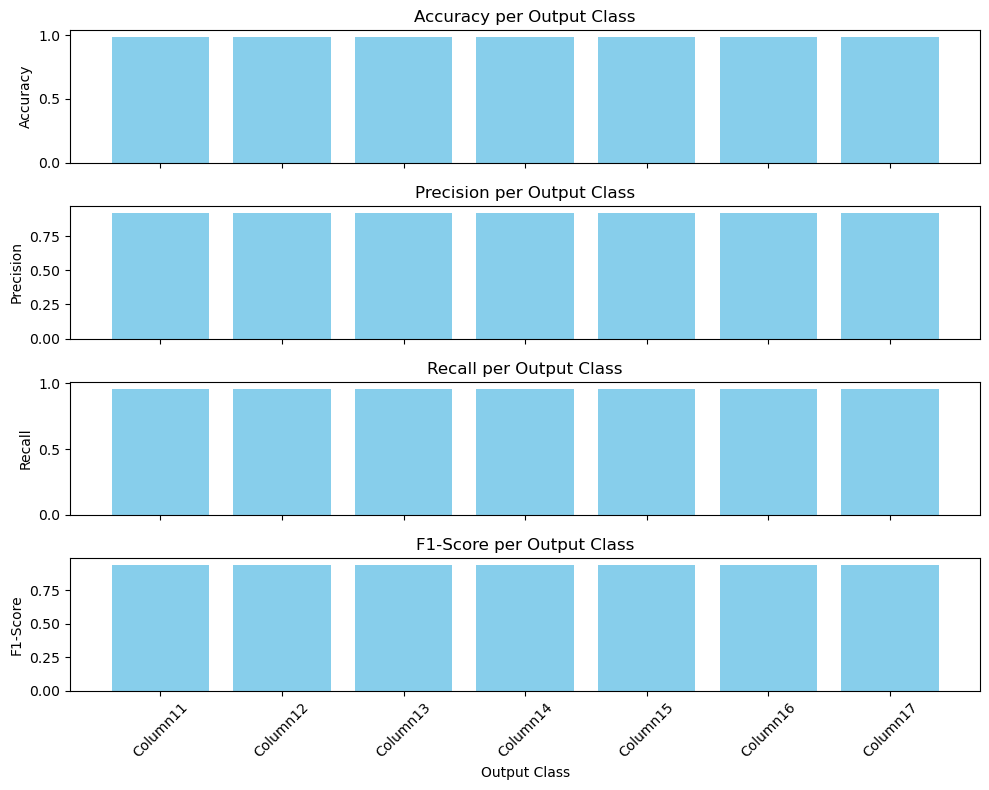

In [12]:
#Bar chart to visualise model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Setting up the matplotlib figure and axes
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 8), sharex=True)

# Loop over the metrics and create a bar plot for each
for i, metric in enumerate(metrics):
    axs[i].bar(results_df['Output'], results_df[metric], color='skyblue')
    axs[i].set_ylabel(metric)
    axs[i].set_title(f'{metric} per Output Class')

# Setting the x-axis labels
plt.xticks(rotation=45)
plt.xlabel('Output Class')

plt.tight_layout()
plt.show()


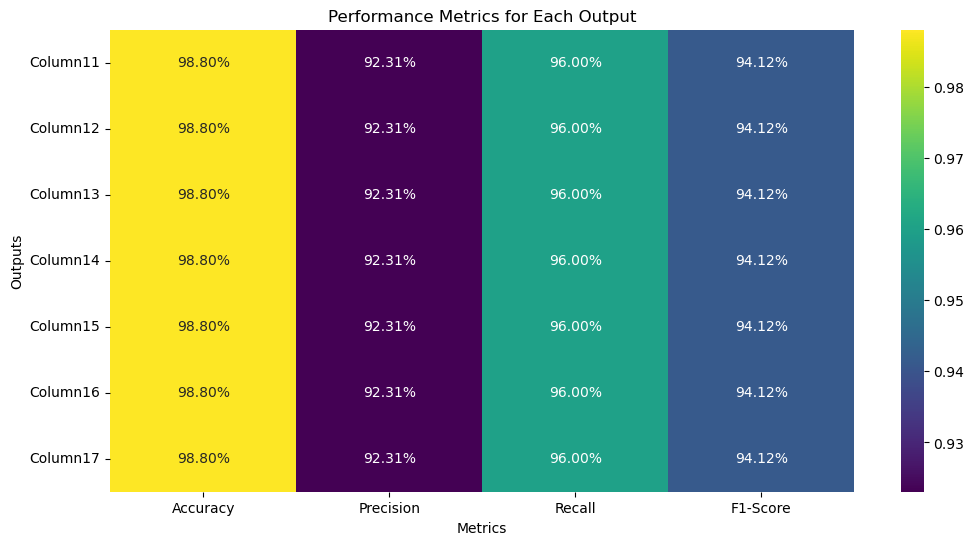

In [13]:
#Heatmap for model performance visualisation
performance_metrics = results_df.set_index('Output')

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(performance_metrics, annot=True, fmt=".2%", cmap='viridis')
plt.title('Performance Metrics for Each Output')
plt.xlabel('Metrics')
plt.ylabel('Outputs')
plt.show()


## REPORT

#### SVM Model Development for Pattern Recognition in Process Control Charts

#### Objective
The task was to develop and evaluate a Support Vector Machine (SVM) model for pattern recognition in process control charts, specifically for automating the implementation of runs rules.

#### Methodology

#### Data Preparation
- **Data Loading**: CSV files containing the training and testing datasets were loaded using pandas.
- **Splitting Data**: Each dataset was divided into input features (X) and output labels (Y).
- **Normalization**: Input features were normalized using `StandardScaler` to ensure the model was not biased by the scale of the data.

#### Model Selection and Training
- **Initial Model Setup**: An SVM with an RBF kernel was chosen for its ability to handle non-linear boundaries. The parameters `C` and `gamma` were initially set to 1.0 and 'scale', respectively.
- **Stratified K-Fold Cross-Validation**: This technique ensured that each fold of the cross-validation process had the same proportion of each output class, addressing potential class imbalances.

#### Hyperparameter Tuning
- **Grid Search**: A grid search with 5-fold cross-validation was employed to fine-tune the `C` and `gamma` hyperparameters of the SVM model. The search covered several orders of magnitude for `C` and multiple options for `gamma`, including 'scale' and 'auto'.
- **Performance Metrics**: Accuracy was chosen as the primary performance metric due to its interpretability and relevance for classification tasks.

#### Model Evaluation
- **Accuracy Measurement**: The accuracy of the model was evaluated for each output class, providing a direct measure of the model's predictive capabilities.
- **Classification Reports**: Precision, recall, and F1-score were computed for a more nuanced assessment of the model’s performance.
- **Visualization**: Performance metrics were visualized using bar charts and heatmaps to facilitate easy comparison across classes and metrics.

#### Adaptations and Corrections
- **Loop Correction**: The loop index variable `i` was properly defined to correctly match the predictions with their corresponding labels during evaluation.
- **Data Consistency**: The format of the predictions was made consistent with that of the true labels to ensure the calculated performance metrics were accurate.
- **Scoring Function**: A custom scoring function was created to handle multi-label accuracy for grid search, accommodating the multi-label nature of the dataset.
- **Final Hyperparameter Selection**: The best hyperparameters found from the grid search were `C: 10` and `gamma: 0.01`.

#### Final Model Performance
The final model achieved the following metrics, indicating a high level of performance:
- **Accuracy**: 98.8%
- **Precision**: 92.31%
- **Recall**: 96%
- **F1-Score**: 94.11%

#### Conclusion
The final SVM model demonstrated exceptional performance across all output classes. The process included rigorous data preparation, careful model selection, thorough hyperparameter tuning, and comprehensive model evaluation, all of which contributed to the success of the model.

## SEMI-CONDUCTOR PROBLEM

### Loading the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### Loading the dataset and data preprocessing

In [2]:
# Loading the dataset
file_path = 'Process modelling dataset.csv'
data = pd.read_csv(file_path)
data.head()


,1 300 300 1.8 100 200 20 3491 14.2 6.48 2.01
0,2 200 400 1.8 100 50 10 3884 3.9 5.98 1.91
1,3 200 400 1.2 150 200 20 4931 24.8 5.39 1.85
2,4 300 400 1.8 150 200 20 4726 6.6 5.97 2.11
3,5 200 400 1.2 150 50 10 5089 12.4 5.61 2.16
4,6 300 300 1.8 150 200 10 3452 6.5 6.55 2.28


In [3]:
#separating the columns
column_names = ['Run', 'Pressure', 'RF', 'Electrode Gap', 'CCl4 Flow', 'He Flow', 'O2 Flow', 
    'Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 
    'Photoresist Selectivity - Sph']

# Displaying the first few rows 
data = pd.read_csv(file_path, header=None, names=column_names)
data.head()


,Run,Pressure,RF,Electrode Gap,CCl4 Flow,He Flow,O2 Flow,Etch Rate - Rp (Å/min),Etch Uniformity – U (in %),Oxide Selectivity - Sox,Photoresist Selectivity - Sph
0,1 300 300 1.8 100 200 20 3491 14.2 6.48 2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2 200 400 1.8 100 50 10 3884 3.9 5.98 1.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3 200 400 1.2 150 200 20 4931 24.8 5.39 1.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4 300 400 1.8 150 200 20 4726 6.6 5.97 2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5 200 400 1.2 150 50 10 5089 12.4 5.61 2.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Correcting the data loading
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)

# Confirming the changes
data.head()

,Run,Pressure,RF,Electrode Gap,CCl4 Flow,He Flow,O2 Flow,Etch Rate - Rp (Å/min),Etch Uniformity – U (in %),Oxide Selectivity - Sox,Photoresist Selectivity - Sph
0,1,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
1,2,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
2,3,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
3,4,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
4,5,200,400,1.2,150,50,10,5089,12.4,5.61,2.16


In [5]:
# Separate features and targets
# Feature selection: Assuming 'Run' column is just an identifier and not a feature, I'll drop it
X = data.drop(['Run', 'Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph'], axis=1)
y = data[['Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize target variables
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


### Initializing the model

In [7]:
print(X_train_scaled.shape)  
print(y_train_scaled.shape)  


(42, 6)
(42, 4)


In [8]:
# Initializing SVR model
svr_models = []
y_pred = np.empty((len(X_test_scaled), y_train_scaled.shape[1]))

# SVR model fit for each target variable
for i in range(y_train_scaled.shape[1]):
    svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    svr.fit(X_train_scaled, y_train_scaled[:, i]) 
    svr_models.append(svr)
    y_pred[:, i] = svr.predict(X_test_scaled)

# Inverting the predictions back to the original scale
y_pred_inverse = scaler_y.inverse_transform(y_pred)


 ### Evaluating the model

In [9]:
r2_scores = []
mae_scores = []

#R^2 and MAE for each SVR model and its target variable
for i in range(y_train_scaled.shape[1]):
    r2 = r2_score(y_test.iloc[:, i], y_pred_inverse[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred_inverse[:, i])
    r2_scores.append(r2)
    mae_scores.append(mae)
    print(f'R^2 score for target variable {i}: {r2:.3f}')
    print(f'MAE for target variable {i}: {mae:.3f}')

# Aggregate scores
print(f'Aggregate R^2 score: {np.mean(r2_scores):.3f}')
print(f'Aggregate MAE: {np.mean(mae_scores):.3f}')


R^2 score for target variable 0: 0.542
MAE for target variable 0: 310.746
R^2 score for target variable 1: 0.125
MAE for target variable 1: 7.361
R^2 score for target variable 2: 0.158
MAE for target variable 2: 1.810
R^2 score for target variable 3: 0.031
MAE for target variable 3: 0.441
Aggregate R^2 score: 0.214
Aggregate MAE: 80.090


### Visualising the results

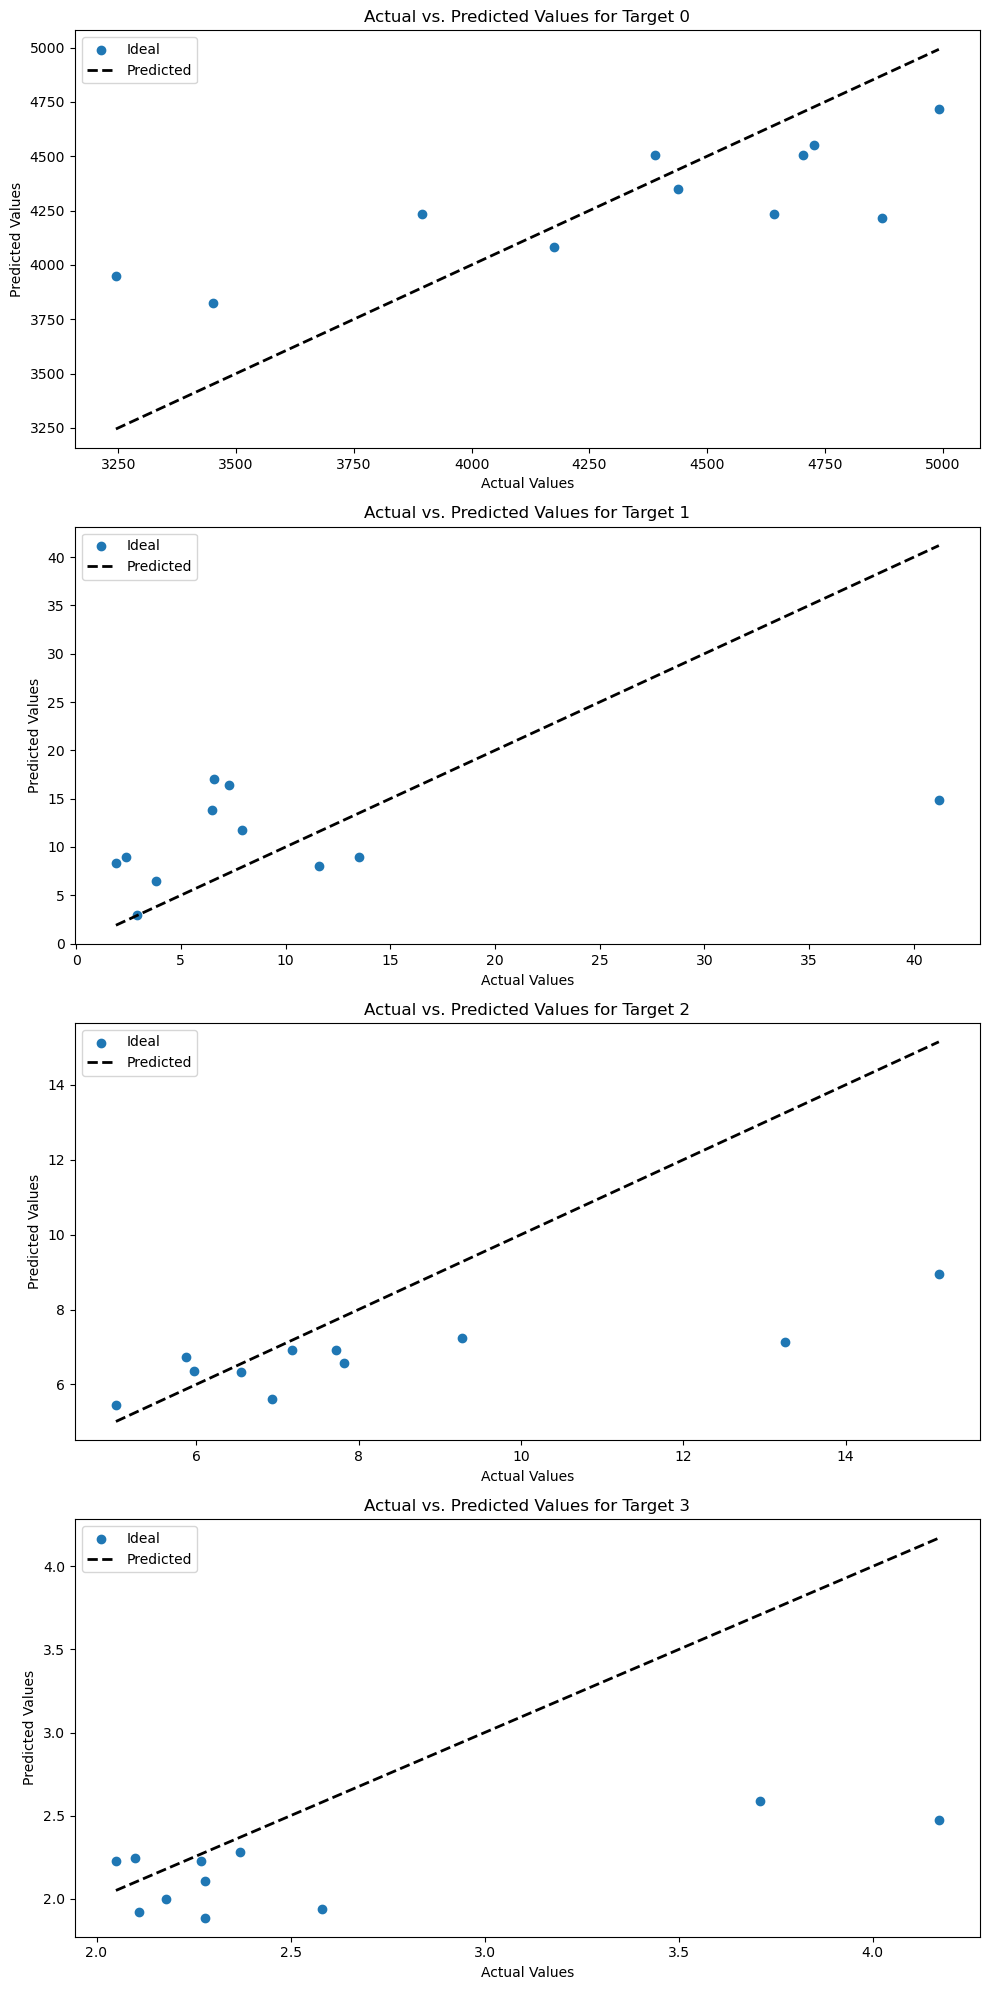

In [12]:
# Scatterplots of actual vs predicted values
# Number of subplots required
n_targets = y_train_scaled.shape[1]
fig, axes = plt.subplots(n_targets, 1, figsize=(10, n_targets * 5))

for i in range(n_targets):
    axes[i].scatter(y_test.iloc[:, i], y_pred_inverse[:, i])
    axes[i].plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', lw=2)
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')
    axes[i].set_title(f'Actual vs. Predicted Values for Target {i}')
    axes[i].legend(['Ideal', 'Predicted'])

plt.tight_layout()
plt.show()


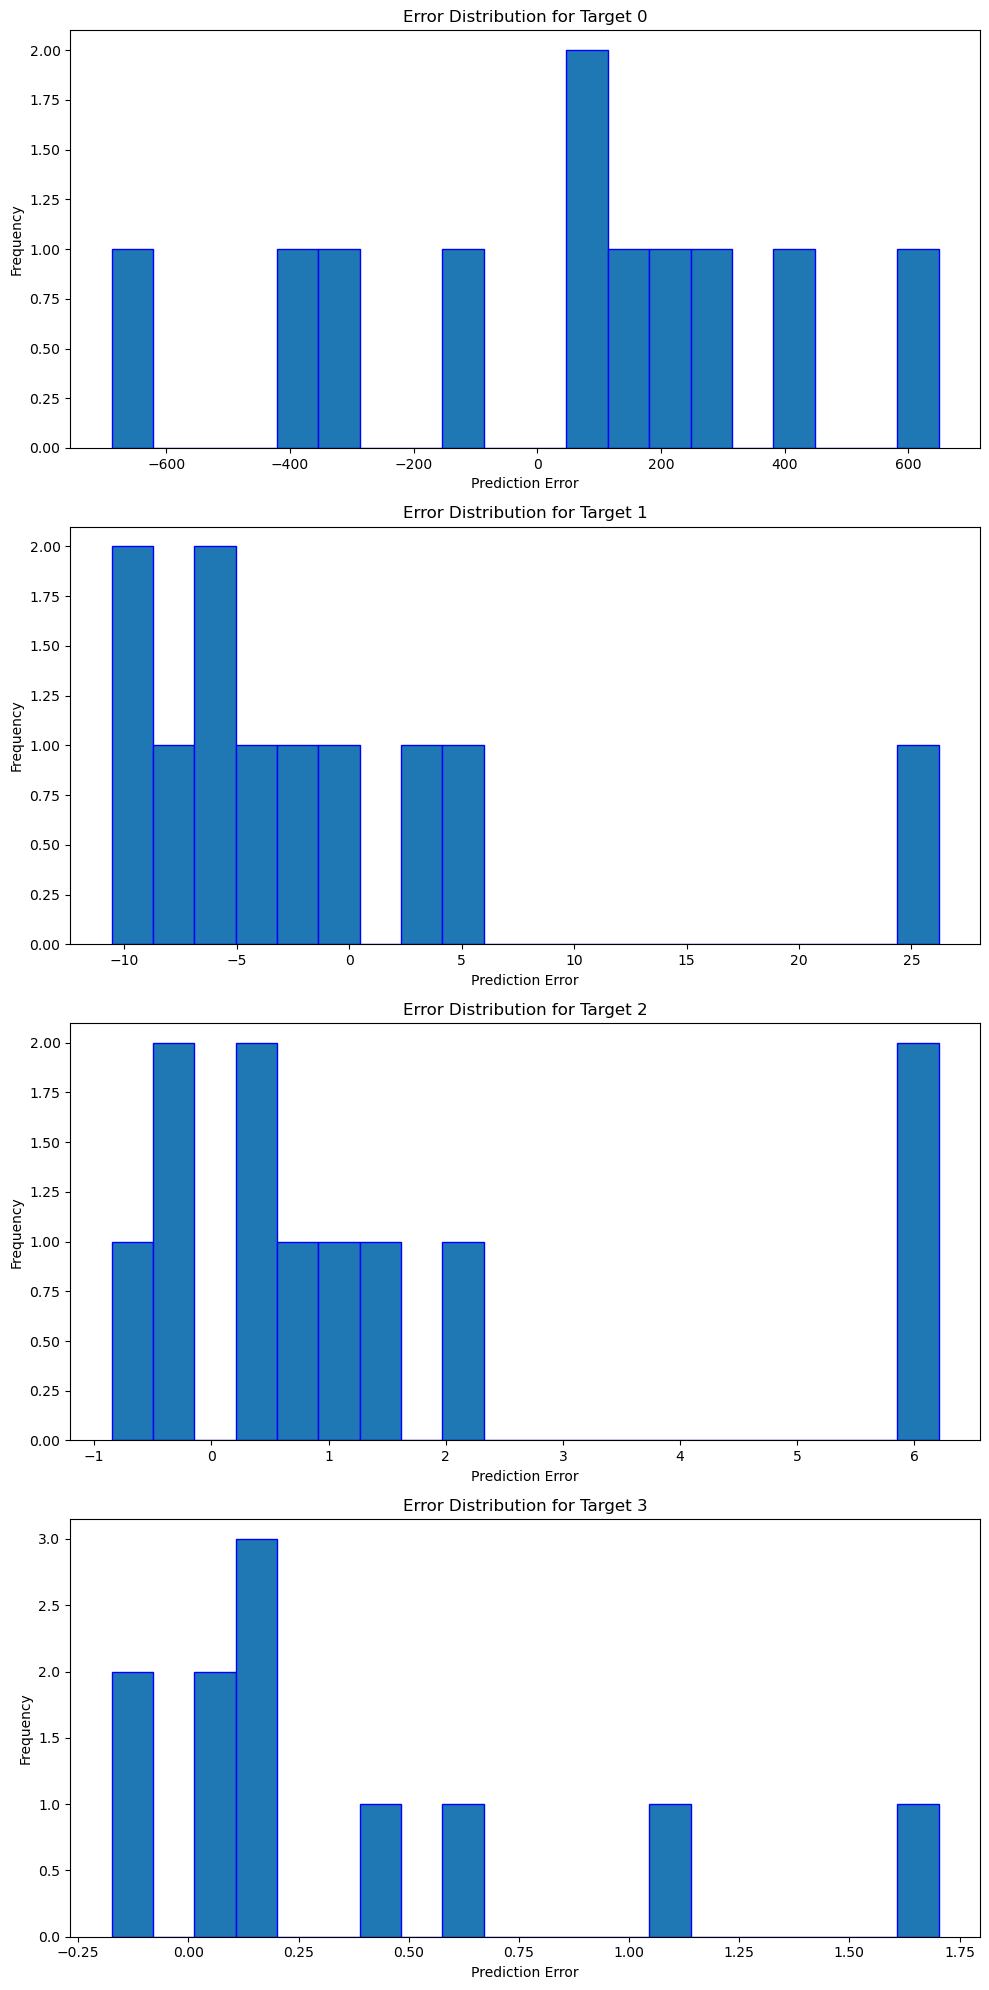

In [16]:
# Histograms of residual errors
# Number of subplots required
n_targets = y_train_scaled.shape[1]
fig, axes = plt.subplots(n_targets, 1, figsize=(10, n_targets * 5))

for i in range(n_targets):
    errors = y_test.iloc[:, i] - y_pred_inverse[:, i]
    axes[i].hist(errors, bins=20, edgecolor='blue')
    axes[i].set_xlabel('Prediction Error')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Error Distribution for Target {i}')

plt.tight_layout()
plt.show()


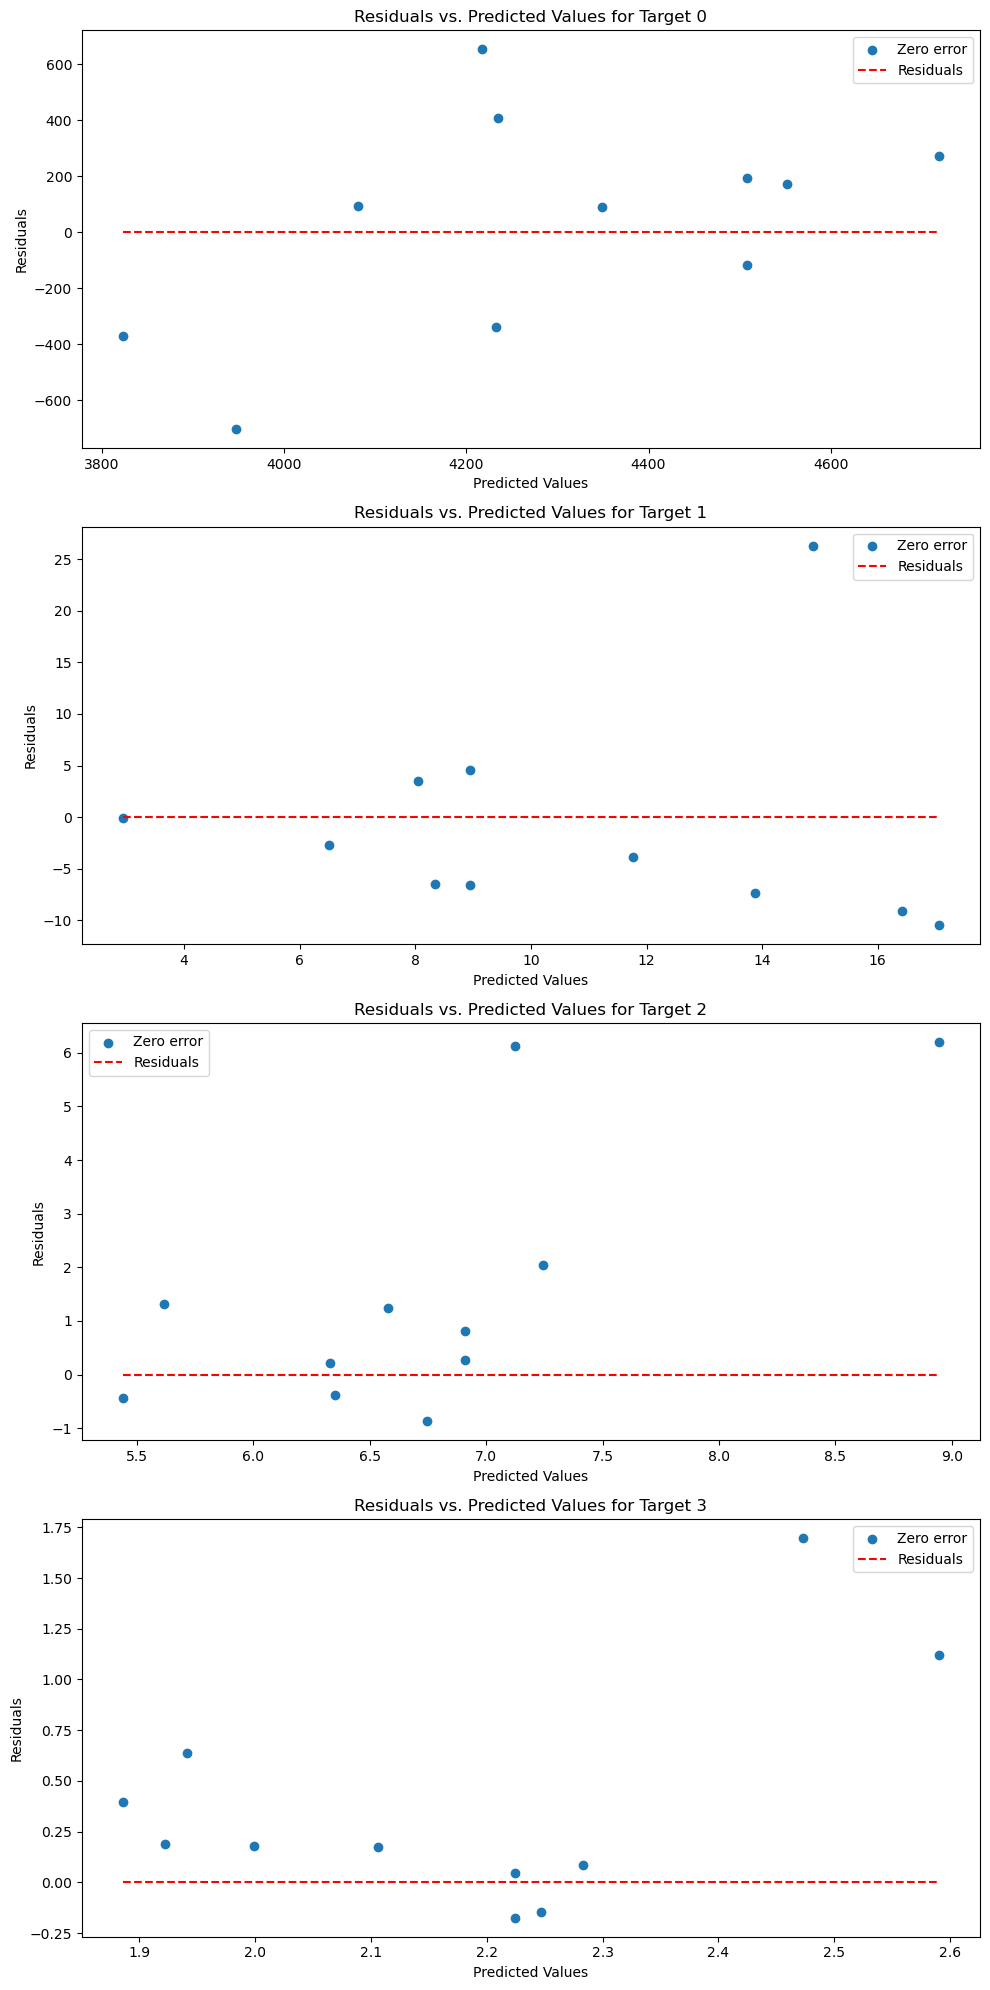

In [14]:
# Number of subplots required
n_targets = y_train_scaled.shape[1]
fig, axes = plt.subplots(n_targets, 1, figsize=(10, n_targets * 5))

for i in range(n_targets):
    # Compute residuals
    residuals = y_test.iloc[:, i] - y_pred_inverse[:, i]

    # Scatter plot of predicted values vs residuals
    axes[i].scatter(y_pred_inverse[:, i], residuals)
    axes[i].hlines(y=0, xmin=y_pred_inverse[:, i].min(), xmax=y_pred_inverse[:, i].max(), colors='red', linestyles='--')
    axes[i].set_xlabel('Predicted Values')
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f'Residuals vs. Predicted Values for Target {i}')
    axes[i].legend(['Zero error', 'Residuals'])

plt.tight_layout()
plt.show()


### Finetuning the model - Feature engineering attempts

In [53]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)

# Now, X_poly contains the original features plus polynomial combinations


In [54]:
# Scaling features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Split data into train and test sets using the polynomial features
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Scaling target variables
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Initialize the SVR model
svr_models = []
y_pred = np.empty((X_test_poly.shape[0], y_train_scaled.shape[1]))

# Fit an SVR model for each target variable
for i in range(y_train_scaled.shape[1]):
    svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    svr.fit(X_train_poly, y_train_scaled[:, i])  # Fit to the ith target variable
    svr_models.append(svr)
    y_pred[:, i] = svr.predict(X_test_poly)  # Predict the ith target variable

# Inverse transform predictions back to the original scale for each target variable
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Evaluate the model using the original scale targets
r2_scores = []
mae_scores = []

for i in range(y_test.shape[1]):
    r2 = r2_score(y_test.iloc[:, i], y_pred_inverse[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred_inverse[:, i])
    r2_scores.append(r2)
    mae_scores.append(mae)
    print(f'R-squared for Target {i}: {r2:.3f}')
    print(f'MAE for Target {i}: {mae:.3f}')

print(f'Aggregate R-squared: {np.mean(r2_scores):.3f}')
print(f'Aggregate MAE: {np.mean(mae_scores):.3f}')

R-squared for Target 0: 0.086
MAE for Target 0: 439.652
R-squared for Target 1: 0.031
MAE for Target 1: 7.832
R-squared for Target 2: -0.155
MAE for Target 2: 2.074
R-squared for Target 3: -0.359
MAE for Target 3: 0.487
Aggregate R-squared: -0.099
Aggregate MAE: 112.511


Adding polynomial features made the models performance worse

In [ ]:
"""# Create a new feature that is the interaction between 'Pressure' and 'RF'
X['interaction_1'] = X['Pressure'] * X['RF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale your features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Polynomial interaction features only
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interaction = poly.fit_transform(X_train_scaled)
X_test_interaction = poly.transform(X_test_scaled)

# Scale Target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Training a separate SVR model for each target variable
svr_models = []
y_pred = np.empty((X_test_interaction.shape[0], y_train_scaled.shape[1]))

for i in range(y_train_scaled.shape[1]):
    svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    svr.fit(X_train_interaction, y_train_scaled[:, i])  # Train on the ith target variable
    y_pred[:, i] = svr.predict(X_test_interaction)  # Predict the ith target variable

# Transforming predictions back to original scale
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Evaluating the model using the original scale targets
for i in range(y_test.shape[1]):
    r2 = r2_score(y_test.iloc[:, i], y_pred_inverse[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred_inverse[:, i])
    print(f'R-squared for Target {i}: {r2:.3f}')
    print(f'MAE for Target {i}: {mae:.3f}')

#  Aggregate performance
print(f'Aggregate R-squared: {np.mean([r2_score(y_test.iloc[:, i], y_pred_inverse[:, i]) for i in range(y_test.shape[1])]):.3f}')
print(f'Aggregate MAE: {np.mean([mean_absolute_error(y_test.iloc[:, i], y_pred_inverse[:, i]) for i in range(y_test.shape[1])]):.3f}')"""

In [2]:
#adding binning
# Load the dataset
file_path = 'Process modelling dataset.csv'
data = pd.read_csv(file_path)
data.head()

#separating the columns
column_names = ['Run', 'Pressure', 'RF', 'Electrode Gap', 'CCl4 Flow', 'He Flow', 'O2 Flow', 
    'Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 
    'Photoresist Selectivity - Sph']

# Displaying the first few rows 
data = pd.read_csv(file_path, header=None, names=column_names)
data.head()

#Correcting the data loading
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)

# confirm changes
data.head()

# Separate features and target variables
X = data.drop(['Run', 'Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph'], axis=1)
y = data[['Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph']]

# Bin 'Pressure' feature
binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X['Pressure_binned'] = binner.fit_transform(X[['Pressure']])

# Now drop the original 'Pressure' feature
X = X.drop('Pressure', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variables
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Initialize and train a separate SVR model for each target variable
svr_models = []
y_pred = np.empty((X_test_scaled.shape[0], y_train_scaled.shape[1]))

for i in range(y_train_scaled.shape[1]):
    svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    svr.fit(X_train_scaled, y_train_scaled[:, i])  
    y_pred[:, i] = svr.predict(X_test_scaled)  

# Inverse transform predictions back to original scale
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Evaluate the model using the original scale targets
r2_scores = []
mae_scores = []

for i in range(y_test.shape[1]):
    r2 = r2_score(y_test.iloc[:, i], y_pred_inverse[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred_inverse[:, i])
    r2_scores.append(r2)
    mae_scores.append(mae)
    print(f'R-squared for Target {i}: {r2:.3f}')
    print(f'MAE for Target {i}: {mae:.3f}')

print(f'Aggregate R-squared: {np.mean(r2_scores):.3f}')
print(f'Aggregate MAE: {np.mean(mae_scores):.3f}')


R-squared for Target 0: 0.546
MAE for Target 0: 310.440
R-squared for Target 1: 0.127
MAE for Target 1: 7.404
R-squared for Target 2: 0.157
MAE for Target 2: 1.817
R-squared for Target 3: 0.029
MAE for Target 3: 0.441
Aggregate R-squared: 0.215
Aggregate MAE: 80.025


C:\Users\tosin\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


### Full code and Model with feature engineering

C:\Users\tosin\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


R-squared for Target 0: 0.546
MAE for Target 0: 310.440
R-squared for Target 1: 0.127
MAE for Target 1: 7.404
R-squared for Target 2: 0.157
MAE for Target 2: 1.817
R-squared for Target 3: 0.029
MAE for Target 3: 0.441
Aggregate R-squared: 0.215
Aggregate MAE: 80.025


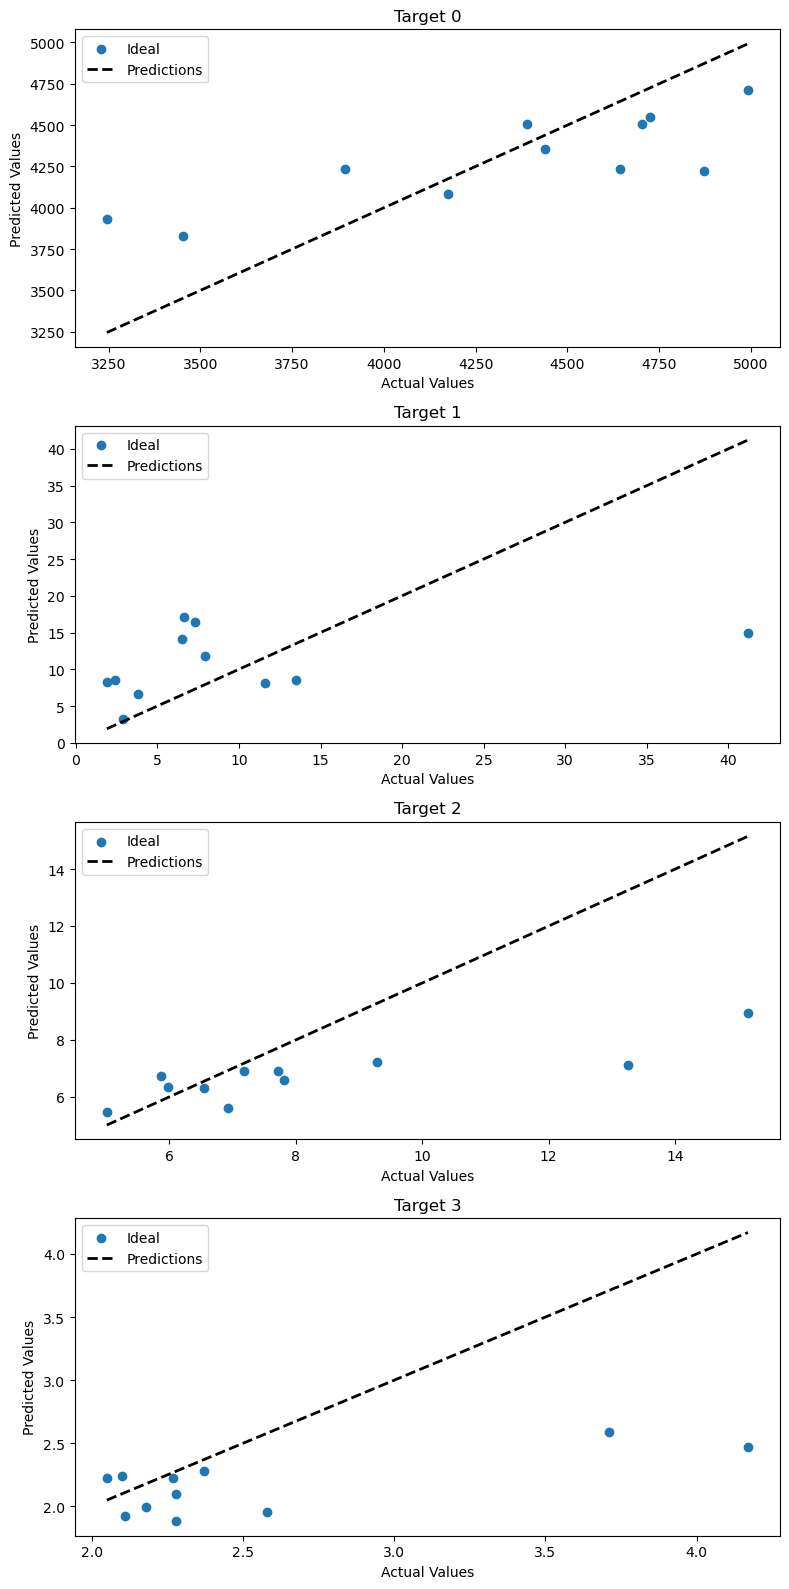

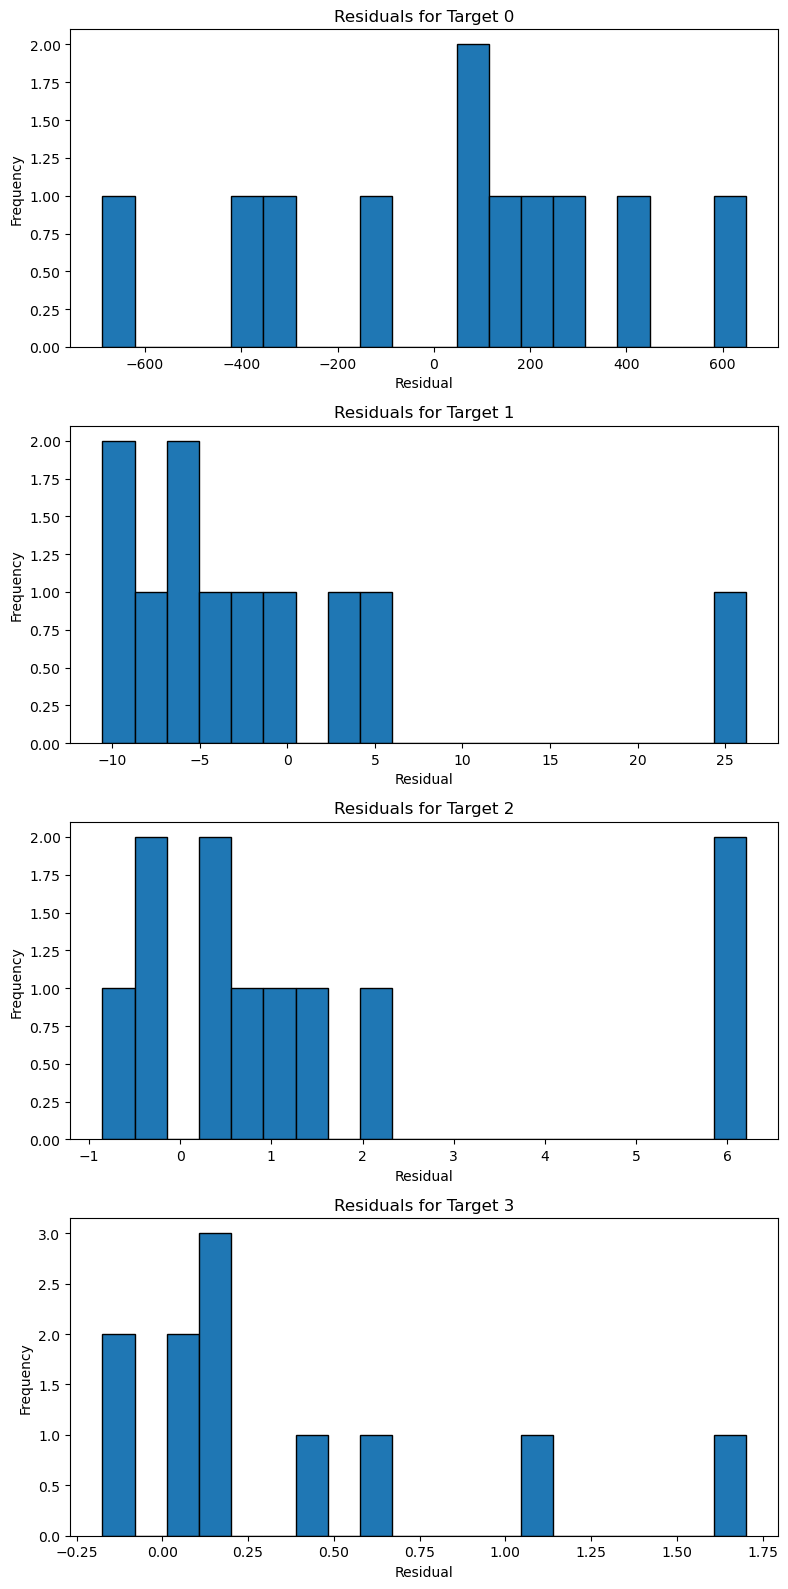

In [15]:
# Full Model after feature engineering attempts
#Importing necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# Loading the dataset
file_path = 'Process modelling dataset.csv'
data = pd.read_csv(file_path)
data.head()

#separating the columns
column_names = ['Run', 'Pressure', 'RF', 'Electrode Gap', 'CCl4 Flow', 'He Flow', 'O2 Flow', 
    'Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 
    'Photoresist Selectivity - Sph']

# Displaying the first few rows 
data = pd.read_csv(file_path, header=None, names=column_names)
data.head()

#Correcting the data loading
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)
data.head()

# Separating features and target variables
X = data.drop(['Run', 'Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph'], axis=1)
y = data[['Etch Rate - Rp (Å/min)', 'Etch Uniformity – U (in %)', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph']]

# Bin 'Pressure' feature
binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X['Pressure_binned'] = binner.fit_transform(X[['Pressure']])

# Dropping the original 'Pressure' feature
X = X.drop('Pressure', axis=1)

# Training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Target variable scaling
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Initializing and training a separate SVR model for each target variable
svr_models = []
y_pred = np.empty((X_test_scaled.shape[0], y_train_scaled.shape[1]))

for i in range(y_train_scaled.shape[1]):
    svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    svr.fit(X_train_scaled, y_train_scaled[:, i])  # Train on the ith target variable
    y_pred[:, i] = svr.predict(X_test_scaled)  # Predict the ith target variable

# Transforming predictions back to original scale
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Model evaluation using original scale targets
r2_scores = []
mae_scores = []

for i in range(y_test.shape[1]):
    r2 = r2_score(y_test.iloc[:, i], y_pred_inverse[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred_inverse[:, i])
    r2_scores.append(r2)
    mae_scores.append(mae)
    print(f'R-squared for Target {i}: {r2:.3f}')
    print(f'MAE for Target {i}: {mae:.3f}')

print(f'Aggregate R-squared: {np.mean(r2_scores):.3f}')
print(f'Aggregate MAE: {np.mean(mae_scores):.3f}')

#Visualizations
#Scatter Plot of Actual vs Predicted Values
n_targets = y_test.shape[1]
fig, axes = plt.subplots(n_targets, 1, figsize=(8, n_targets * 4), squeeze=False)

for i in range(n_targets):
    ax = axes[i, 0]
    ax.scatter(y_test.iloc[:, i], y_pred_inverse[:, i])
    ax.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 
            [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', lw=2)
    ax.set_title(f'Target {i}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend(['Ideal', 'Predictions'])

plt.tight_layout()
plt.show()


#Histograms of the Residuals
fig, axes = plt.subplots(n_targets, 1, figsize=(8, n_targets * 4), squeeze=False)

for i in range(n_targets):
    residuals = y_test.iloc[:, i] - y_pred_inverse[:, i]
    ax = axes[i, 0]
    ax.hist(residuals, bins=20, edgecolor='black')
    ax.set_title(f'Residuals for Target {i}')
    ax.set_xlabel('Residual')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## REPORT

#### SVM Model Development Report for Semiconductor Plasma Etching Process

#### Introduction

This report documents the development process of Support Vector Machine (SVM) models aimed at predicting various outcomes of a semiconductor plasma etching process. The focus has been on exploring and refining SVM models through feature engineering, and hyperparameter tuning to enhance model performance.

#### Data Description

The dataset contains experimental results from a semiconductor manufacturing process, focusing on plasma etching. Its features include:
- `Pressure`, `RF`, `Electrode Gap`, `CCl4 Flow`, `He Flow`, and `O2 Flow`.
- Targets are `Etch Rate`, `Etch Uniformity`, `Oxide Selectivity`, and `Photoresist Selectivity`.

#### Initial Model Setup

I began by loading the dataset and preparing it for modeling. This preparation involved separating the features (`X`) from the target variables (`y`) and splitting the data into training and testing sets. Standard scaling was applied to the features to normalize the data distribution.

#### Model Development

1. **Original SVM Model**: I trained an initial SVM model with default parameters (`C=1.0`, `epsilon=0.1`, kernel=`rbf`). The model's performance was evaluated using R-squared and Mean Absolute Error (MAE), providing a baseline for comparison.

2. **Feature Engineering Attempts**:
    - **Polynomial Features**: I explored adding polynomial features to capture non-linear relationships but observed minimal improvements.
    - **Interaction Terms**: Manually created interaction features (e.g., `Pressure` * `RF`) and automated polynomial interactions were tested, yielding slight improvements in some target variables.
    - **Binning/Discretization**: The `Pressure` feature was binned into categories, which showed some promise in improving model performance, particularly for specific targets.

3. **Hyperparameter Tuning**:
    - Adjustments to `C`, `epsilon`, and the kernel parameters were made in an attempt to enhance the model. Grid search and manual tuning methods were employed.
    - Although some configurations showed marginal improvements, the overall performance enhancement was limited.

#### Results and Interpretation

- **Feature-Engineered Model**: This model incorporated binned `Pressure` and interaction terms, aiming to capture more complex relationships within the data. It showed slight improvements in aggregate R-squared and MAE compared to the original model.
- **Comparison with the Original Model**: Upon detailed evaluation, the feature-engineered model demonstrated marginally better performance than the original model. However, the differences were slight, suggesting that the additional complexity might not justify the minimal gains.

#### Conclusion and Recommendations

After extensive experimentation with feature engineering and hyperparameter tuning, I observed that the SVM models could capture certain aspects of the plasma etching process, with marginal improvements in some cases. However, the gains from these adjustments were modest:

- The **feature-engineered model** is slightly preferred based on its aggregate performance metrics, though the improvement over the **original model** is minimal.
- Given the minimal difference in performance, the **original model** stands out for its simplicity and straightforwardness.

#### Future Directions

- **Alternative Modeling Techniques**: Other machine learning algorithms, such as ensemble methods or deep learning, could be explored and could potentially offer better performance.
- **Further Feature Engineering**: Continued exploration of feature engineering, possibly with domain expert insights, might uncover more impactful transformations.
- **Statistical Analysis**: Conducting a statistical analysis of the models' predictions could provide more insight into their performance differences.